# Exploratory Data Analysis

First, code from this [notebook](https://github.com/mdeff/fma/blob/master/usage.ipynb) 

In [2]:
%matplotlib inline

import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

import utils

plt.rcParams['figure.figsize'] = (17, 5)

In [3]:
# Directory where mp3 are stored.
#AUDIO_DIR = os.environ.get('AUDIO_DIR')

# Load metadata and features.
tracks = utils.load('data/fma_metadata/tracks.csv')
genres = utils.load('data/fma_metadata/genres.csv')
features = utils.load('data/fma_metadata/features.csv')
echonest = utils.load('data/fma_metadata/echonest.csv')

np.testing.assert_array_equal(features.index, tracks.index)
assert echonest.index.isin(tracks.index).all()

tracks.shape, genres.shape, features.shape, echonest.shape

((106574, 52), (163, 4), (106574, 518), (13129, 249))

## 1 Metadata

The metadata table, a CSV file in the `fma_metadata.zip` archive, is composed of many colums:
1. The index is the ID of the song, taken from the website, used as the name of the audio file.
2. Per-track, per-album and per-artist metadata from the Free Music Archive website.
3. Two columns to indicate the subset (small, medium, large) and the split (training, validation, test).

In [4]:
ipd.display(tracks['track'].head())
ipd.display(tracks['album'].head())
ipd.display(tracks['artist'].head())
ipd.display(tracks['set'].head())

,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,
2,256000,0,NaN,2008-11-26 01:48:12,2008-11-26,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,256000,0,NaN,2008-11-26 01:48:14,2008-11-26,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
5,256000,0,NaN,2008-11-26 01:48:20,2008-11-26,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
10,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
20,256000,0,NaN,2008-11-26 01:48:56,2008-01-01,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type
track_id,,,,,,,,,,,,,
2,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
3,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
5,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
10,0,2008-11-26 01:45:08,2008-02-06,NaN,4,6,NaN,47632,NaN,[],Constant Hitmaker,2,Album
20,0,2008-11-26 01:45:05,2009-01-06,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],Niris,13,Album


,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page
track_id,,,,,,,,,,,,,,,,,
2,2006-01-01,NaT,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,[awol],http://www.AzillionRecords.blogspot.com,NaN
3,2006-01-01,NaT,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,[awol],http://www.AzillionRecords.blogspot.com,NaN
5,2006-01-01,NaT,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,[awol],http://www.AzillionRecords.blogspot.com,NaN
10,NaT,NaT,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3,2008-11-26 01:42:55,74,6,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"[philly, kurt vile]",http://kurtvile.com,NaN
20,1990-01-01,2011-01-01,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2,2008-11-26 01:42:52,10,4,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,"[instrumentals, experimental pop, post punk, e...",NaN,NaN


,split,subset
track_id,,
2,training,small
3,training,medium
5,training,small
10,training,small
20,training,large


### 1.1 Subsets

The small subsets is selected with the below code.

In [97]:
small = tracks[tracks['set', 'subset'] <= 'small']
small.shape

(8000, 52)

## 2 Genres

The genre hierarchy is stored in `genres.csv` and distributed in `fma_metadata.zip`.

In [6]:
print('{} top-level genres'.format(len(genres['top_level'].unique())))
genres.loc[genres['top_level'].unique()].sort_values('#tracks', ascending=False)

16 top-level genres


,#tracks,parent,title,top_level
genre_id,,,,
38,38154,0,Experimental,38
15,34413,0,Electronic,15
12,32923,0,Rock,12
1235,14938,0,Instrumental,1235
10,13845,0,Pop,10
17,12706,0,Folk,17
21,8389,0,Hip-Hop,21
2,5271,0,International,2
4,4126,0,Jazz,4


## 3 Features

1. Features extracted from the audio for all tracks.
2. For some tracks, data colected from the [Echonest](http://the.echonest.com/) API.

In [7]:
print('{1} features for {0} tracks'.format(*features.shape))
columns = ['mfcc', 'chroma_cens', 'tonnetz', 'spectral_contrast']
columns.append(['spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff'])
columns.append(['rmse', 'zcr'])
for column in columns:
    ipd.display(features[column].head().style.format('{:.2f}'))

518 features for 106574 tracks


### 3.1 Echonest features

In [8]:
print('{1} features for {0} tracks'.format(*echonest.shape))
ipd.display(echonest['echonest', 'metadata'].head())
ipd.display(echonest['echonest', 'audio_features'].head())
ipd.display(echonest['echonest', 'social_features'].head())
ipd.display(echonest['echonest', 'ranks'].head())

249 features for 13129 tracks


,album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release
track_id,,,,,,,
2,NaN,NaN,32.6783,"Georgia, US",-83.2230,AWOL,AWOL - A Way Of Life
3,NaN,NaN,32.6783,"Georgia, US",-83.2230,AWOL,AWOL - A Way Of Life
5,NaN,NaN,32.6783,"Georgia, US",-83.2230,AWOL,AWOL - A Way Of Life
10,2008-03-11,Constant Hitmaker,39.9523,"Philadelphia, PA, US",-75.1624,Kurt Vile,Constant Hitmaker
134,NaN,NaN,32.6783,"Georgia, US",-83.2230,AWOL,AWOL - A Way Of Life


,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss
track_id,,,,,
2,0.388990,0.386740,0.406370,0.000000,0.000000
3,0.388990,0.386740,0.406370,0.000000,0.000000
5,0.388990,0.386740,0.406370,0.000000,0.000000
10,0.557339,0.614272,0.798387,0.005158,0.354516
134,0.388990,0.386740,0.406370,0.000000,0.000000


,artist_discovery_rank,artist_familiarity_rank,artist_hotttnesss_rank,song_currency_rank,song_hotttnesss_rank
track_id,,,,,
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
10,2635.0,2544.0,397.0,115691.0,67609.0
134,NaN,NaN,NaN,NaN,NaN


,000,001,002,003,004,005,006,007,008,009,...,214,215,216,217,218,219,220,221,222,223
track_id,,,,,,,,,,,,,,,,,,,,,
2,0.877233,0.588911,0.354243,0.295090,0.298413,0.309430,0.304496,0.334579,0.249495,0.259656,...,-1.992303,6.805694,0.233070,0.192880,0.027455,0.06408,3.67696,3.61288,13.316690,262.929749
3,0.534429,0.537414,0.443299,0.390879,0.344573,0.366448,0.419455,0.747766,0.460901,0.392379,...,-1.582331,8.889308,0.258464,0.220905,0.081368,0.06413,6.08277,6.01864,16.673548,325.581085
5,0.548093,0.720192,0.389257,0.344934,0.361300,0.402543,0.434044,0.388137,0.512487,0.525755,...,-2.288358,11.527109,0.256821,0.237820,0.060122,0.06014,5.92649,5.86635,16.013849,356.755737
10,0.311404,0.711402,0.321914,0.500601,0.250963,0.321316,0.734250,0.325188,0.373012,0.235840,...,-3.662988,21.508228,0.283352,0.267070,0.125704,0.08082,8.41401,8.33319,21.317064,483.403809
134,0.610849,0.569169,0.428494,0.345796,0.376920,0.460590,0.401371,0.449900,0.428946,0.446736,...,-1.452696,2.356398,0.234686,0.199550,0.149332,0.06440,11.26707,11.20267,26.454180,751.147705


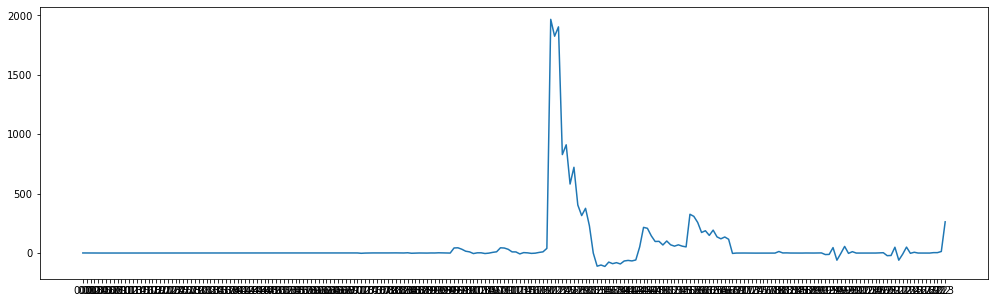

In [9]:
ipd.display(echonest['echonest', 'temporal_features'].head())
x = echonest.loc[2, ('echonest', 'temporal_features')]
plt.plot(x);

### 3.2 Features like MFCCs are discriminant

((2000, 2), (2000,))

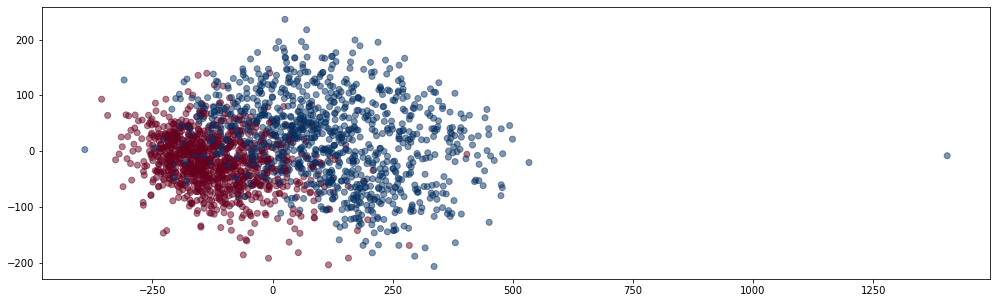

In [10]:
small = tracks['set', 'subset'] <= 'small'
genre1 = tracks['track', 'genre_top'] == 'Instrumental'
genre2 = tracks['track', 'genre_top'] == 'Hip-Hop'

X = features.loc[small & (genre1 | genre2), 'mfcc']
X = skl.decomposition.PCA(n_components=2).fit_transform(X)

y = tracks.loc[small & (genre1 | genre2), ('track', 'genre_top')]
y = skl.preprocessing.LabelEncoder().fit_transform(y)

plt.scatter(X[:,0], X[:,1], c=y, cmap='RdBu', alpha=0.5)
X.shape, y.shape

## Now, let's explore on our own
### Explore the features at our disposition

In [11]:
from scipy.stats import chisquare

#### Dates of the music

We will analyse music from 2008 to 2018, that looks quite uniformly distributed in time

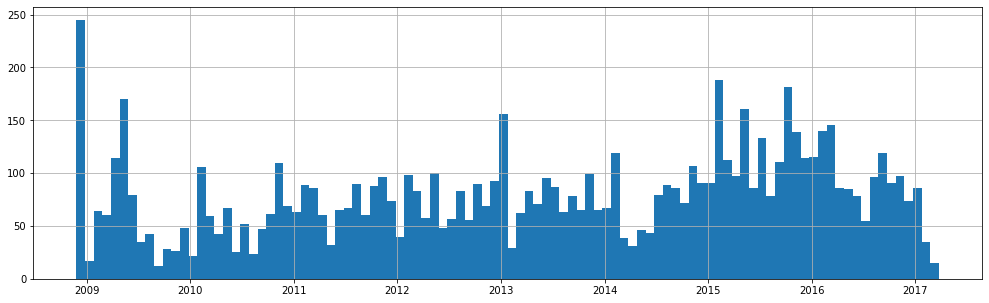

In [12]:
small = tracks[tracks['set', 'subset'] <= 'small']
small['track']['date_created'].hist(bins=100)

In [98]:
small['track'].groupby('genre_top')['listens'].nlargest(5)

genre_top      track_id
Electronic     42377       543252
               69170       335215
               31040       171269
               26651       154579
               28553       128907
Experimental   20296        68678
               26605        65239
               84417        61948
               7391         29134
               7554         26492
Folk           23014        42250
               23371        39497
               50952        38116
               23015        37970
               131904       21516
Hip-Hop        24425       433992
               22295       131509
               89192        87126
               57820        72591
               11773        67014
Instrumental   54159       294602
               95722       177368
               73495        57615
               50956        39003
               108027       34834
International  73760        77335
               44952        63770
               113259       56719
               64593    

In [24]:
small.loc[55718]

album   comments                                                             9
        date_created                                       2011-10-31 12:49:26
        date_released                                      2010-02-11 00:00:00
        engineer                                                           NaN
        favorites                                                           15
        id                                                               10331
        information          <p> </p>\n<p>Electronic trip-hop and down temp...
        listens                                                         212127
        producer                                                           NaN
        tags                                                                []
        title                                     The agency of missing hearts
        tracks                                                              11
        type                                        

In [33]:
small_features = features[tracks['set', 'subset'] <= 'small']

### About the chroma in each song

The 'chroma_cens' feature corresponds to “Chroma Energy Normalized”. It is a more robust measure of the Chroma vector, which represents how much energy of each pitch class is present in the signal.

The main idea of CENS features is that taking statistics over large windows smooths local deviations in tempo, articulation, and musical ornaments such as trills and arpeggiated chords.

For each of the 12 pitch classes, we have data about statistics on their chroma :  max, min, mean, median, but also  skew, kurtosis, and standard deviation.

We can look at the distribution of the pitches that have on average the most energy in the signal, that would potentially be the tonic of each song.

In [45]:
small_features['chroma_cens']['mean'].head()

number,01,02,03,04,05,06,07,08,09,10,11,12
track_id,,,,,,,,,,,,
2,0.474300,0.369816,0.236119,0.228068,0.222830,0.221415,0.229238,0.248795,0.196245,0.175809,0.200713,0.319972
5,0.258420,0.303385,0.250737,0.218562,0.245743,0.236018,0.275766,0.293982,0.346324,0.289821,0.246368,0.220939
10,0.229882,0.286978,0.240096,0.226792,0.192443,0.288410,0.413348,0.349137,0.268424,0.243144,0.268941,0.236763
140,0.161163,0.272767,0.295905,0.255588,0.260886,0.252854,0.193282,0.191970,0.291551,0.319938,0.198516,0.120607
141,0.150417,0.155785,0.217253,0.224969,0.273518,0.295436,0.259958,0.181313,0.177233,0.296048,0.331963,0.218315


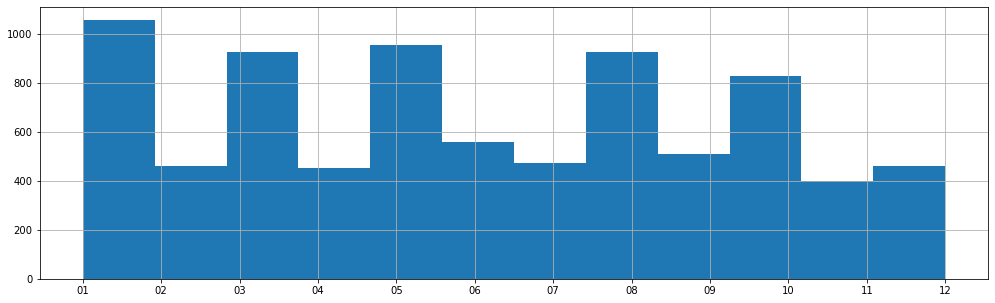

In [56]:
small_features['chroma_cens']['mean'].idxmax(axis=1).sort_values().hist(bins=12)

Interestingly, we observe that the pitch that is on average the maximum is more frequently white keys from the piano, rather than black ones.

We also have other chroma features like 'chroma_cqt', and 'chroma_stft' that give us other insights on chroma in each songs.

### Mel-frequency cepstral coefficients (MFCCs)

One other feature that is interesting is the MFCCs. This are the coefficients that describe the short-term power spectrum of a sound, that itself describes how power of a signal or time series is distributed over frequency.

In [78]:
small_features['mfcc']['mean']

number,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20
track_id,,,,,,,,,,,,,,,,,,,,
2,-163.772964,116.696678,-41.753826,29.144329,-15.050158,18.879372,-8.918165,12.002118,-4.253151,1.359791,-2.683000,-0.794632,-6.920971,-3.655366,1.465213,0.201078,3.998204,-2.114676,0.116842,-5.785884
5,-205.440491,132.215073,-16.085823,41.514759,-7.642954,16.942802,-5.651261,9.569445,0.503157,8.673513,-8.271377,0.594473,-0.340203,2.377888,7.899487,1.947641,7.441950,-1.739911,0.278015,-5.489016
10,-135.864822,157.040085,-53.453247,17.198896,6.868035,13.934344,-11.749298,8.360711,-5.130381,0.233845,-5.421206,1.679479,-6.218249,1.844195,-4.099704,0.779950,-0.559577,-1.018324,-3.807545,-0.679533
140,-225.713318,139.332825,-13.097699,44.533356,2.468400,28.328743,-9.931481,10.810857,3.002879,-0.937692,7.138268,-6.625260,0.824269,-2.003132,4.293943,-7.935050,0.063948,-2.363509,-0.158602,0.594098
141,-253.143906,155.716324,-16.636627,23.683815,6.045957,11.692952,-9.947761,6.887814,-3.273322,-6.340906,7.602782,-5.851329,2.017422,-4.396296,-3.689521,-0.929987,0.783247,0.768126,2.809321,3.325740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154308,-288.879303,152.342087,-2.517532,8.582313,-0.384105,4.368904,3.391255,5.985993,9.245567,4.665963,4.699042,0.592779,2.949878,5.256505,1.607061,2.205407,-1.347569,2.550121,5.137365,6.354999
154309,-367.696625,104.314285,11.179615,-9.774891,-12.614079,1.173940,-10.825560,-10.481558,-12.770616,-8.729056,-13.194090,-6.167614,-5.817488,0.828269,-1.539551,-2.340352,-6.185808,-5.277195,-9.561085,-8.861394
154413,-229.868378,155.606247,4.354007,45.476540,-7.373891,22.758905,2.523344,9.925150,7.117429,1.199985,3.841901,4.540169,4.224662,1.915167,-1.782451,4.374582,6.465470,1.281081,4.305267,0.595658


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2e2d3feb0>,
      dtype=object)

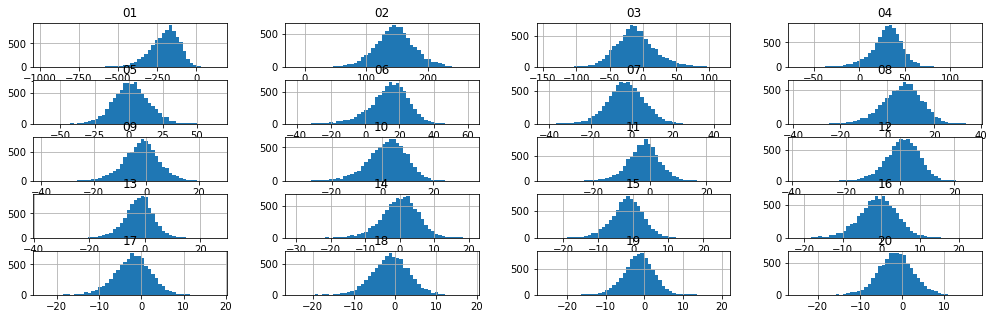

In [91]:
small_features['mfcc']['mean'].hist(bins=50)

### Root-mean-square (RMS) energy 

Corresponds to how 'loud' the music is.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2e2083a30>]],
      dtype=object)

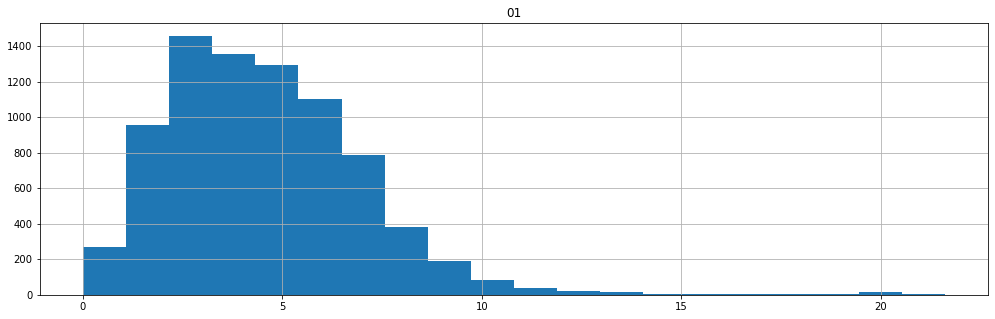

In [81]:
small_features['rmse']['mean'].hist(bins=20)

The RMSE is distributed around 3-4.

### Spectral Bandwidth, centroid, contrast and rolloff

The spectral bandwidth is defined as the band width at one-half the peak maximum

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2e23fe670>]],
      dtype=object)

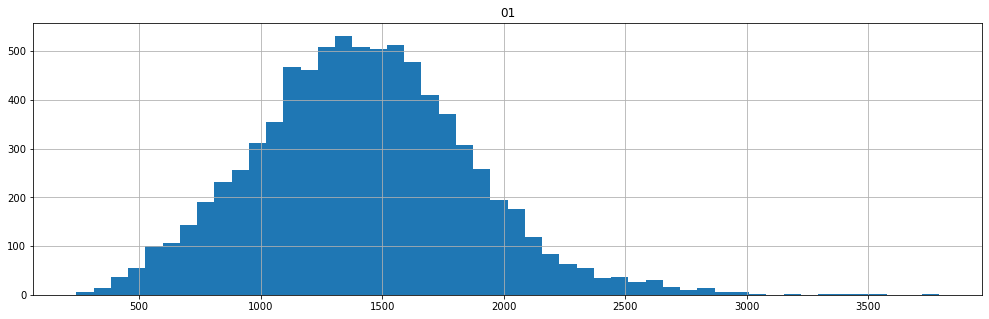

In [84]:
small_features['spectral_bandwidth']['mean'].hist(bins=50)

The centroid is an acoustical descriptor of timbre. Estimates the center of mass of the spectrum (in Hz)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2e25f9880>]],
      dtype=object)

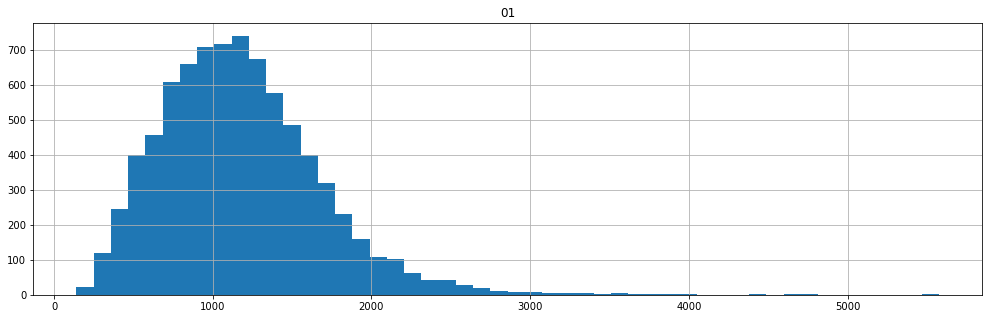

In [88]:
small_features['spectral_centroid']['mean'].hist(bins=50)

Spectral contrast different than MFCC in the following aspect : works on octaves and considers spectral peak, spectral valley and their difference in each sub-band.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2e28200a0>,
      dtype=object)

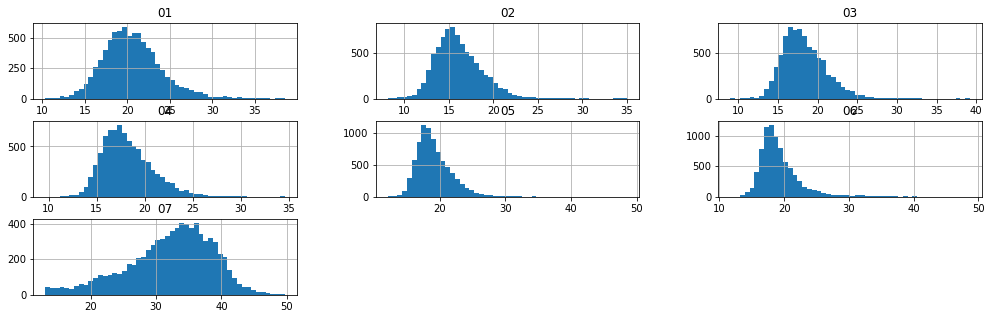

In [89]:
small_features['spectral_contrast']['mean'].hist(bins=50)

### Tonnetz

Tonnetz centroids :

0: Fifth x-axis

1: Fifth y-axis

2: Minor x-axis

3: Minor y-axis

4: Major x-axis

5: Major y-axis

In [94]:
small_features['spectral_contrast']['mean'].head()

number,01,02,03,04,05,06,07
track_id,,,,,,,
2,18.005175,15.363138,17.129013,17.157160,18.087046,17.616112,38.268646
5,17.097452,15.969444,18.646988,16.973648,17.292145,19.255819,36.413609
10,19.177481,14.281867,15.510051,16.541273,20.316816,18.967014,34.886196
140,18.151390,16.298210,18.562231,18.060900,21.355371,19.176929,36.932270
141,19.646608,18.583612,19.953085,18.620075,22.643318,23.950989,29.015615


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2e85c0b80>,
      dtype=object)

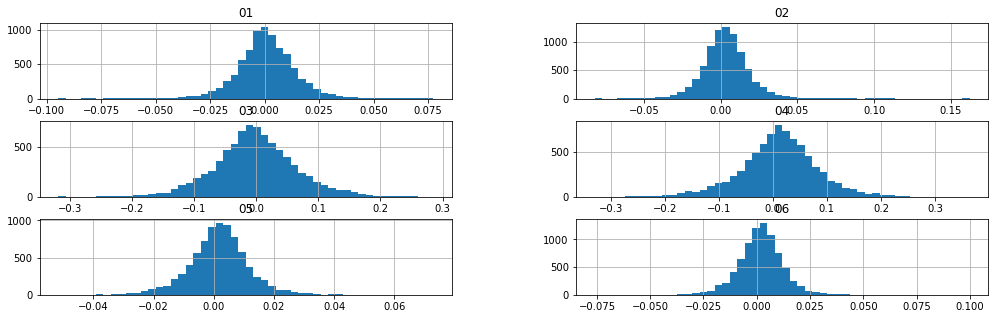

In [93]:
small_features['tonnetz']['mean'].hist(bins=50)

### Zero Crossing Rate

The rate at which a signal changes from positive to zero to negative or from negative to zero to positive.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2e929d3d0>]],
      dtype=object)

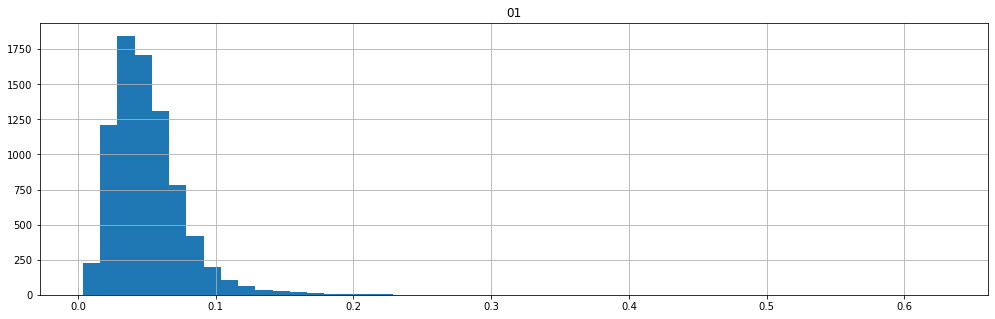

In [95]:
small_features['zcr']['mean'].hist(bins=50)

## Popularity measures

The two popularity measures for the tracks are the number of listenings and the 'interest'.

The second one is kinda obscure, so we will focus on the first one, the number of streams.

Let's investigate how each of the previous is correlated to the number of listenings, with some basic regression analysis.

In [118]:
regression_df = pd.DataFrame()
regression_df['listens'] = small['track']['listens']
regression_df['tonic'] = small_features['chroma_cens']['mean'].idxmax(axis=1)
regression_df['loudness'] = small_features['rmse']['mean']
regression_df['spectral_bandwith'] = small_features['spectral_bandwidth']['mean']
regression_df['ZCR'] = small_features['zcr']['mean']
regression_df.head()

,listens,tonic,loudness,spectral_bandwith,ZCR
track_id,,,,,
2,1293,01,3.188761,1607.474365,0.085629
5,1151,09,3.251386,1512.917358,0.053114
10,50135,07,3.893810,1420.259644,0.077515
140,1299,10,2.953848,1475.625366,0.052379
141,725,11,2.576761,1192.835571,0.040267


In [176]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [123]:
mod = smf.ols(formula='listens ~ C(tonic)+loudness+spectral_bandwith+ZCR', data=regression_df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                listens   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.783
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           0.000379
Time:                        17:11:46   Log-Likelihood:                -86619.
No. Observations:                8000   AIC:                         1.733e+05
Df Residuals:                    7985   BIC:                         1.734e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3894.3849    597.154      6.522      0.000    2723.806    5064.963
C(tonic)[T.02]      344.1589    681.509      0.505      0.614    -991.777    1680.095
C(tonic)[T.03]     -260.9056    549.930     -0.474      0.635   -1338.913     817.102
C(tonic)[T.04]      559.6154    686.244      0.815      0.415    -785.602    1904.832
C(tonic)[T.05]     -791.4610    545.483     -1.451      0.147   -1860.751     277.829
C(tonic)[T.06]     -355.4451    639.107     -0.556      0.578   -1608.262     897.372
C(tonic)[T.07]     -758.9719    676.598     -1.122      0.262   -2085.282     567.338
C(tonic)[T.08]     -813.6974    549.598     -1.481      0.139   -1891.053     263.658
C(tonic)[T.09]     1221.2014    659.657      1.851      0.064     -71.899    2514.302
C(tonic)[T.10]     -301.0269    566.432     -0.531      0.595   -1411.382     809.328
C(tonic)[T.11]     -916.1798    715.902     -1.280      0.201   -2319.535     487.175
C(tonic)[T.12]     -785.8983    683.208     -1.150      0.250   -2125.164     553.368
loudness            181.6048     57.076      3.182      0.001      69.720     293.489
spectral_bandwith     0.7408      0.404      1.833      0.067      -0.052       1.533
ZCR               -1.505e+04   6082.520     -2.474      0.013    -2.7e+04   -3123.225
==============================================================================
Omnibus:                    18665.805   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        208709528.773
Skew:                          22.934   Prob(JB):                         0.00
Kurtosis:                     792.952   Cond. No.                     6.63e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The loudness and ZCR seem to be good predictors for the popularity ! (p value is less than 0.05) Indeed, popular musics seem to be loud (positive coefficient) while having low ZCR (negative coefficient)

Now let's do some classification. For that, we need to define different levels of popularity

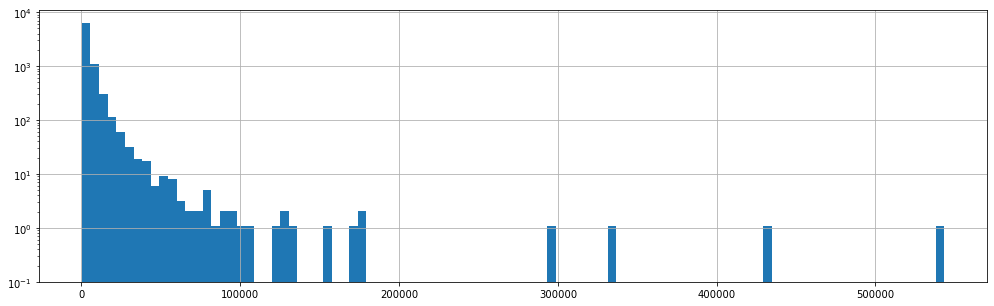

In [130]:
fig, ax = plt.subplots()
small['track']['listens'].hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')

When log-scaled, the distribution seems to follow a power law. 
Let's try to make four different classes : unpopular (<1000), moderatly popular (<2000), popular (<10000), extremely popular( >10000)

In [145]:
def popularity_measure(listens):
    if listens < 1000:
        return 'unpopular'
    elif listens < 2000:
        return 'moderatly popular'
    elif listens < 10000:
        return 'popular'
    else:
        return 'extremely popular'

In [146]:
regression_df['Popularity'] = regression_df.apply(lambda row: popularity_measure(row['listens']), axis=1)

In [150]:
regression_df.groupby('Popularity').count()['listens']

Popularity
extremely popular     705
moderatly popular    1940
popular              3975
unpopular            1380
Name: listens, dtype: int64

Let's try some PCA, for example with the 'tonnetz' feature

((8000, 4), (8000,))

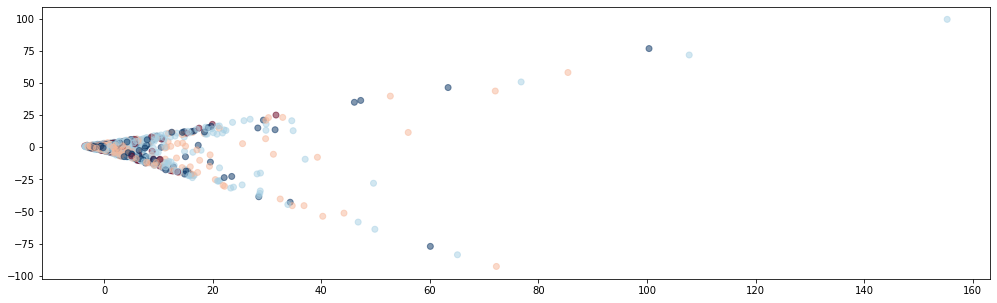

In [242]:
X = features.loc[small, 'tonnetz']
#X = regression_df.drop(['Popularity', 'listens', 'tonic'], axis=1)
X = skl.decomposition.PCA(n_components=4).fit_transform(X)


y = regression_df['Popularity']
y = skl.preprocessing.LabelEncoder().fit_transform(y)

plt.scatter(X[:,0], X[:,1], c=y, cmap='RdBu', alpha=0.5)
X.shape, y.shape

Doesn't work very well, let's see if we have better results with LDA and the chroma feature

In [247]:
X = features.loc[small, 'chroma_cens']
#X = regression_df.drop(['Popularity', 'listens', 'tonic'], axis=1)
y = regression_df['Popularity']

In [248]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

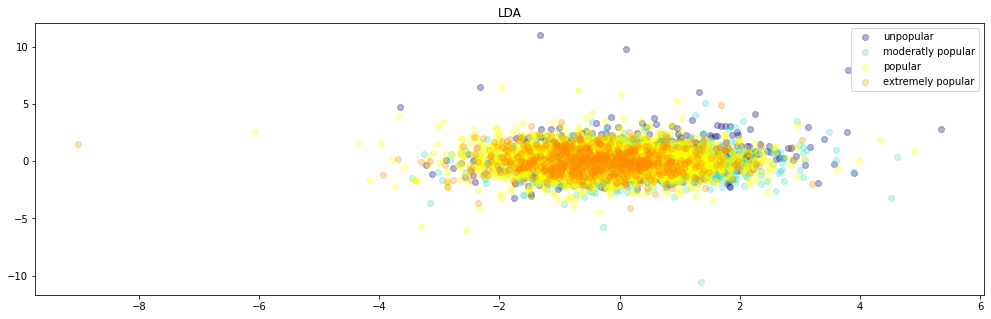

In [252]:
plt.figure()
colors = ['navy', 'turquoise', 'yellow', 'darkorange']

for color, target_name in zip(colors, ['unpopular', 'moderatly popular', 'popular', 'extremely popular']):
    plt.scatter(X_r2[y == target_name, 0], X_r2[y == target_name, 1], alpha=.3, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA')

plt.show()


Still not that good, but if we only look at extremes, it sort of gives a result ! That is encouraging for our future research

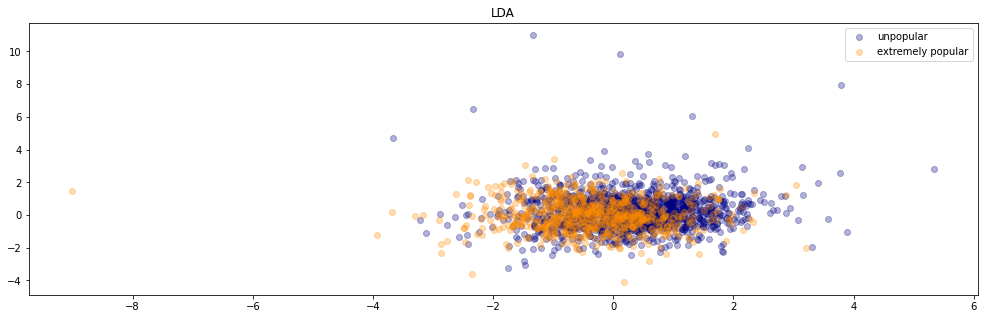

In [253]:
plt.figure()
colors = ['navy', 'darkorange']

for color, target_name in zip(colors, ['unpopular', 'extremely popular']):
    plt.scatter(X_r2[y == target_name, 0], X_r2[y == target_name, 1], alpha=.3, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA')

plt.show()